# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [ ]:
# Import all necessary dependencies
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [1]:
#If the above code doesn't work, use this one where the executable path for the chromedriver is specified.
from splinter import Browser
from bs4 import BeautifulSoup as soup
from selenium.webdriver.chrome.service import Service
import matplotlib.pyplot as plt
import pandas as pd

my_service = Service(executable_path='/Users/brendanguanminzhu/Desktop/chromedriver-mac-x64/chromedriver')
# Launch the browser
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [2]:
#Show the url that will be webscraped and visit the url through the chrome browser
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [3]:
# Get the entire html and and use soup to extract the text elements
html = browser.html
weather_soup = soup(html, 'html.parser')

In [4]:
#Extract all rows of data
rows = weather_soup.find_all("tr", class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [5]:
#Make an empty list that will be appended
list = []
#Loop through the scraped data to make a list of rows
for row in rows:
    td = row.find_all('td')
    row = [col.text for col in td]
    list.append(row)

In [6]:
#Make a Pandas DataFrame by using the list of rows and specify the column names
df = pd.DataFrame(list, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [7]:
#Show the first 5 rows of the dataframe
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
#Look at data types for each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
#Change data types to the appropriate ones
df.terrestrial_date = pd.to_datetime(df.terrestrial_date)
df.sol = df.sol.astype('int')
df.ls = df.ls.astype('int')
df.month = df.month.astype('int')
df.min_temp = df.min_temp.astype('float')
df.pressure = df.pressure.astype('float')

In [10]:
#Check that the data types are the same as the previous block of code
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [11]:
# 1. How many months are there on Mars?
df['month'].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [12]:
# 2. How many Martian days' worth of data are there?
df.sol.nunique()

1867

In [13]:
# 3. What is the average low temperature by month?
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
avg_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

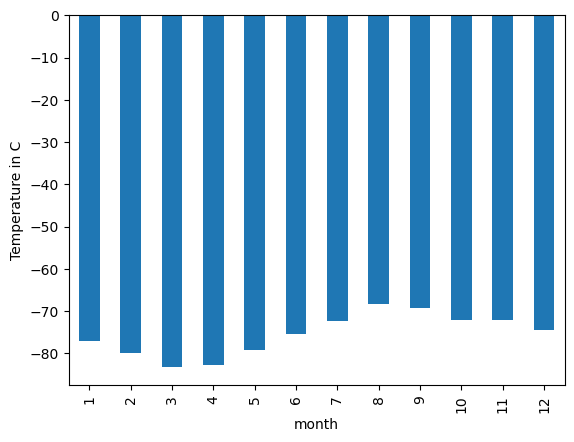

In [16]:
#Make a bar graph for the average minimum temperature per month
avg_min_temp_by_month.plot(kind='bar')
plt.ylabel('Temperature in C')
plt.xlabel('Month')
plt.show()

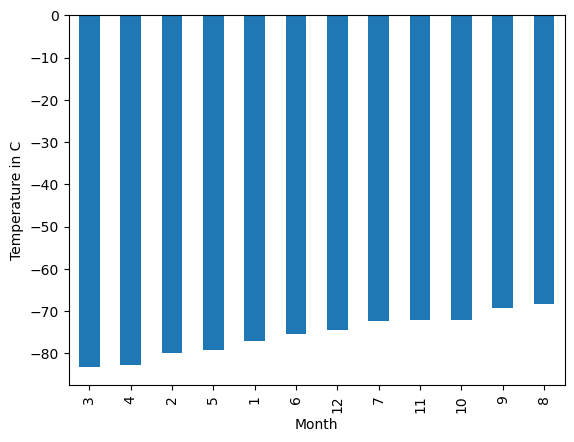

In [17]:
#Find the coldest and hottest months in Curiosity's location
avg_min_temp_by_month.sort_values().plot(kind='bar')
plt.ylabel('Temperature in C')
plt.xlabel('Month')
plt.show()

In [18]:
# 4. Average pressure by Martian month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

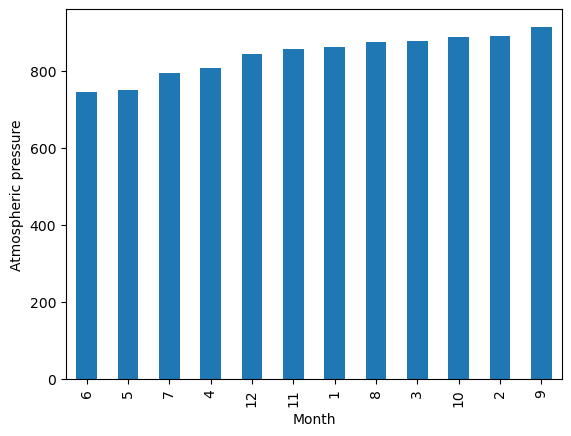

In [21]:
#Plot the average pressure by month
avg_pressure_by_month.sort_values().plot(kind='bar')
plt.ylabel('Atmospheric pressure')
plt.xlabel('Month')
plt.show()

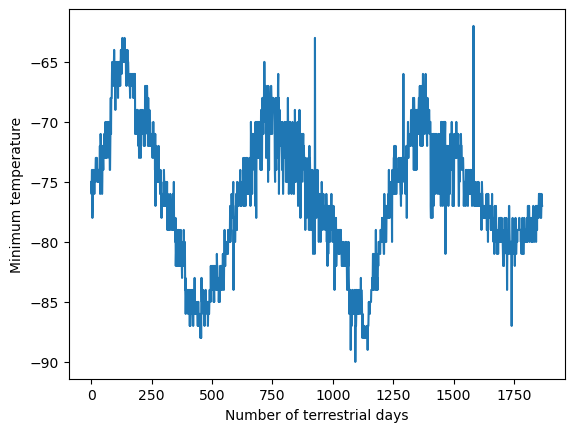

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df.min_temp.plot()
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum temperature")
plt.show()

According to the 1st and 2nd bar graphs, the third month has the lowest temperature on average while the eighth month has the highest temperature on average for Mars.

Looking at the 3rd bar graph, the sixth month has the lowest atmospheric pressure on average while the ninth month has the highest atmospheric pressure on average for Mars.

The above graph shows that if we look at the highest points since those indicate when Mars has completed one revolution with respect to the Sun, the difference between those maximum points is approximately 665(1625-950). One Mars year is 687 Earth days. 665 is a close estimate based on the visualization created from the data scraped.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
#Write the data to a CSV titled mars_data.csv
df.to_csv('mars_data.csv', index=False)

In [24]:
browser.quit()